In [1]:
!pip install opendatasets
"""
get your kaggle key and kaggle username https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/
"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'\nget your kaggle key and kaggle username https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/\n'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
folder = "https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset"
import opendatasets as od
import keras
from tensorflow.keras import datasets, layers, models, optimizers
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import applications
from tensorflow.keras.models import Model, Sequential
import warnings
warnings.filterwarnings("ignore")
od.download(folder)
     

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anushsom
Your Kaggle Key: ··········


100%|██████████| 750M/750M [00:33<00:00, 23.3MB/s]


In [3]:
batch_size = 32
img_height = 224
img_width = 224
data_path="/content/stanford-dogs-dataset/images/Images"
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.2, 
    rescale=1./255.   
)
train_ds = datagen.flow_from_directory(
    data_path,
    target_size = (img_height,img_width),
    batch_size = 32,
    subset = 'training',
    shuffle = True,
)
val_ds = datagen.flow_from_directory(
    data_path,
    target_size = (img_height,img_width),
    batch_size = 32,
    subset = 'validation',
    shuffle = True,
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


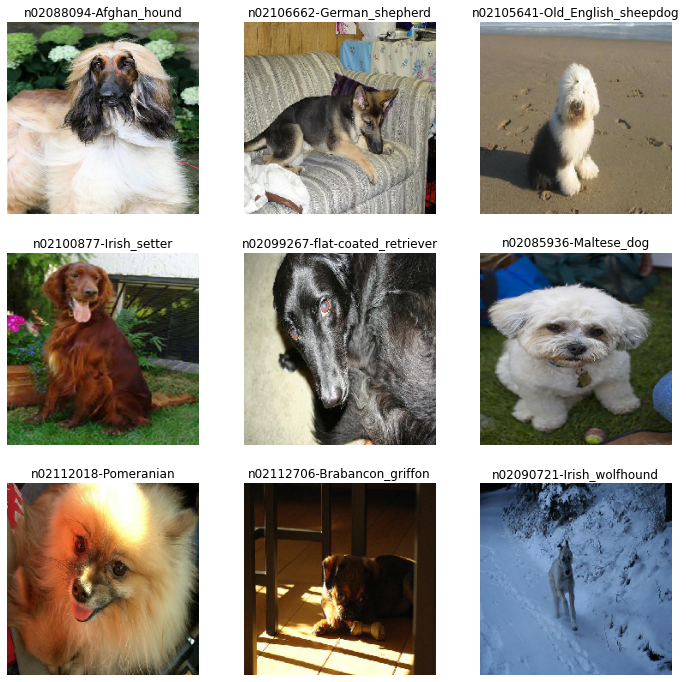

In [4]:
import numpy as np
class_labels = list(train_ds.class_indices.keys())
plt.figure(figsize=(12, 12))
for img,label in train_ds:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[i])
    plt.title(class_labels[int(np.where(label[i]==1)[0][0])])
    plt.axis('off')
  break

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

from keras.models import Sequential
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(300, activation='relu'),
  layers.Dense(240, activation='relu'),
  layers.Dense(120, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)       

In [13]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.3 MB/s eta 0:00:00


In [14]:
model.compile(
  optimizer='adam',
  loss="categorical_crossentropy",
  metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall(),tfa.metrics.F1Score(num_classes=120)]
)

In [15]:
epochs = 20
history1=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


516/516 [==============================] - 165s 275ms/step - loss: 4.6770 - accuracy: 0.0170 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0073 - val_loss: 4.5193 - val_accuracy: 0.0231 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0049
Epoch 2/20
516/516 [==============================] - 140s 270ms/step - loss: 4.4089 - accuracy: 0.0326 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0208 - val_loss: 4.3370 - val_accuracy: 0.0408 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0189
Epoch 3/20
516/516 [==============================] - 139s 269ms/step - loss: 4.2449 - accuracy: 0.0494 - precision: 0.5000 - recall: 6.0577e-05 - f1_score: 0.0336 - val_loss: 4.2345 - val_accuracy: 0.0572 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0276
Epoch 4/20
516/516 [==============================] - 141s 272ms/step - loss: 4.0916 - accuracy: 0.0690 - precision: 0.3333 - recall: 1.2115e-04 - f1_score: 

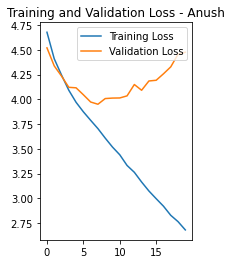

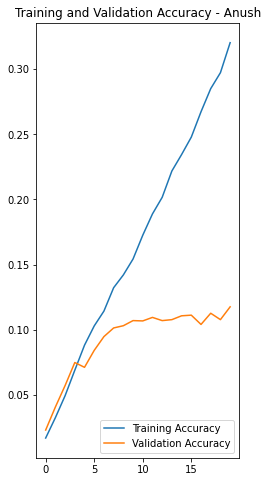

In [43]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - Anush')


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - Anush')

plt.show()

In [17]:
with open("PES1UG20CS068_history_Normal.pkl", "wb") as f:
  pickle.dump(history1.history,f)

In [18]:
eval1=model.evaluate(val_ds)

128/128 [==============================] - 16s 128ms/step - loss: 4.4750 - accuracy: 0.1176 - precision: 0.3008 - recall: 0.0386 - f1_score: 0.1098


In [35]:

import pandas as pd
cnn = {
    'model' : ['CNN'],
    'accuracy' : [round(max(history1.history['val_accuracy']),4)*100],
    'precession' : [round(max(history1.history['val_precision_2']),4)*100],
    'recall' : [round(max(history1.history['val_recall_2']),4)*100],
    'f1 score' : [round(history1.history['val_f1_score'][-1][-1],4)*100]
}
cnn = pd.DataFrame(cnn)

KeyError: ignored

In [23]:
img_width, img_height = 224, 224 
InceptionV3 = applications.InceptionV3(include_top= False, input_shape= (img_width, img_height, 3), weights= 'imagenet')
InceptionV3.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_3[0][0]']               
 alization)           

In [24]:
for layer in InceptionV3.layers:
    layer.trainable= False
    
model = Sequential()
model.add(InceptionV3)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(120,activation='softmax'))
model.summary()
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [25]:

!pip install tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
model.compile(
    optimizer= 'adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall(),tfa.metrics.F1Score(num_classes=120)]
)
     

In [27]:
history2 = model.fit(
    train_ds, 
    validation_data = val_ds,
    epochs = 5,
    shuffle = True
)
    

Epoch 1/5
516/516 [==============================] - 111s 204ms/step - loss: 1.1608 - accuracy: 0.7048 - precision_1: 0.8064 - recall_1: 0.6393 - f1_score: 0.7015 - val_loss: 0.8892 - val_accuracy: 0.7628 - val_precision_1: 0.8060 - val_recall_1: 0.7377 - val_f1_score: 0.7544
Epoch 2/5
516/516 [==============================] - 94s 182ms/step - loss: 0.6500 - accuracy: 0.8095 - precision_1: 0.8456 - recall_1: 0.7854 - f1_score: 0.8069 - val_loss: 0.8995 - val_accuracy: 0.7728 - val_precision_1: 0.8085 - val_recall_1: 0.7559 - val_f1_score: 0.7677
Epoch 3/5
516/516 [==============================] - 93s 180ms/step - loss: 0.4965 - accuracy: 0.8449 - precision_1: 0.8693 - recall_1: 0.8253 - f1_score: 0.8427 - val_loss: 0.9180 - val_accuracy: 0.7721 - val_precision_1: 0.8067 - val_recall_1: 0.7554 - val_f1_score: 0.7701
Epoch 4/5
516/516 [==============================] - 92s 179ms/step - loss: 0.4077 - accuracy: 0.8674 - precision_1: 0.8885 - recall_1: 0.8498 - f1_score: 0.8659 - val_los

In [28]:
with open("PES1UG20CS068_history_Pretrained.pkl", "wb") as f:
  pickle.dump(history2.history,f)

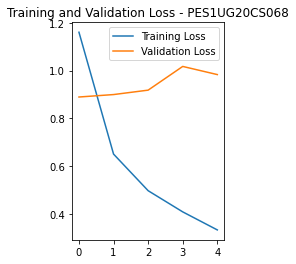

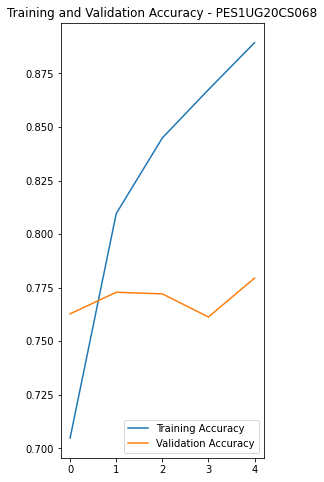

In [44]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(5)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - PES1UG20CS068')

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - PES1UG20CS068')


plt.show()